In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13

#### Due date: See the [Calendar](https://htmlpreview.github.io/?https://github.com/UBC-CS/cpsc330-2023s/blob/master/docs/calendar.html).

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. (Optional) [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. (Optional) [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. (Optional) [Your takeaway from the course](#15)

## Submission instructions <a name="si"></a>
<hr>
rubric={points:4}

You will receive marks for correctly submitting this assignment. To submit this assignment, follow the instructions below:

- **You may work on this assignment in a group (group size <= 4) and submit your assignment as a group.** 
- Below are some instructions on working as a group.  
    - The maximum group size is 4. 
    - You can choose your own group members. 
    - Use group work as an opportunity to collaborate and learn new things from each other. 
    - Be respectful to each other and make sure you understand all the concepts in the assignment well. 
    - It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. [Here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members) are some instructions on adding group members in Gradescope.  
- Be sure to follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2023s/blob/main/docs/homework_instructions.md).
- Upload the .ipynb file to Gradescope.
- **If the .ipynb file is too big or doesn't render on Gradescope for some reason, also upload a pdf or html in addition to the .ipynb.** 
- Make sure that your plots/output are rendered properly in Gradescope.

## Imports

In [2]:
import os

%matplotlib inline
import string
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os
import re
import sys
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import tests_hw5
from sklearn import datasets
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from lightgbm.sklearn import LGBMClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV
import eli5

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this mini project, you will be working on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. You can find this information in the documentation on [the dataset page on Kaggle](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

For PAY_N it seems like -2 indicates there was no payment but there was no balance. -1 indicates that the full balance has been payed out. 0 indicates that the required payment was made, but it did not pay off the full balance. 1 and up indicates the payment delay in months.  

The PAY_AMT columns by themselves probably don't provide much useful information, however the interaction of PAY_AMT with other columns could be very useful. For example if no payments are made on an account, it could mean someone is about to default if they've been accruing balance, or it could mean they aren't going to default because they haven't bought anything.

I'm thinking now I'll definitely have to do some feature engineering on PAY_N, PAY_AMTN, and BILL_AMTN in order to get meaningfull numbers.

Sex if I keep it should be binary not numeric, ID doesn't matter so It'll be removed, Marriage is categorical despite being numeric in the file, education should be ordinal (despite being numeric in the file) but there are two numbers for unknown so I might change all of the 'unknowns' to 5. The rest are numeric and will require scaling if I use a model other than decision trees.

In [3]:
data = pd.read_csv("data/UCI_Credit_Card.csv")
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

In [4]:
train_df, test_df = train_test_split(data, test_size=0.3, random_state=123)
X_train = train_df.drop(columns="default.payment.next.month")
y_train = train_df[["default.payment.next.month"]]
X_test = test_df.drop(columns="default.payment.next.month")
y_test = test_df[["default.payment.next.month"]]

<!-- END QUESTION -->

<br><br>

In [5]:
train_df['EDUCATION'].value_counts()

2    9815
1    7433
3    3416
5     210
4      81
6      35
0      10
Name: EDUCATION, dtype: int64

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

2. two useful summary statistics are:
 - the mean value of default.payment.next.month indicates that the classes are somewhat imbalanced since only ~22% defaults.
 - both EDUCATION and MARRIAGE have some zero values which aren't described in the dataset (Marriage shouldn't have 0's) so I am assuming those are unknowns. 
 I will replace the 0's with NaN, and impute them
 
2. I have created plots for two features that show some patterns within the data, and indicate those features are likely to be helpful for the model
 - the histogram of LIMIT_BAL indicates that someone with a low limit is far more likely to default then someone with a high limit
 - the histogram of PAY_0 shows that if someone was late by 2 months on the last month, then they are more likely to default than not. However, individuals with -2, -1, and 0 are far
 more likely not to default
 
3. 
Based on looking at the data it seems like the PAY_N features have a lot to say, in that people with higher numbers in PAY_N are more likely to default, although it isn't quite that simple because its possible the existance of a positive number says more about the total. For example, multiple -1's followed by a 2 might be more likely to default than someone with consistant 0's. A more complicated model might find a way to do some feature engineering within PAY_N or some relation to PAY_AMT or BILL_AMT but I'm not including it in this model. While these columns could make sense as either ordinal or numeric, I think I will leave them as numeric and scale them like the other numeric columns.

Now to look at the BILL_AMT and PAY_AMT features. In an of themselves they probably don't have that much of a say. An example being someone who has a higher limit may have a higher balance than someone who defaults every single month, but they pay it off every single month too. It could also be that the ratio of bill to payment has a say in whether someone defaults or not. This is probably the location that I will focus most of my feature engineering.

While I didn't display the plots that I made for them, It appeared that data such as SEX and AGE did have an affect, but not as strongly as either LIMIT_BAL and PAY_0 did, worth including but probably not a main focus for me.

4.
When considering the potential confusion matrix for this problem, I am deciding that accuracy is likely not the best metric to assess this data. A dummy classifier would get it right roughly 78% of the time which seems rather high. Instead, I am considering precision and recall, although I will likely want to optimize recall since a false negative is probably worse than a false positive, as it means the bank would assume someone is not going to default when they actually are. I have to set a threshold though, since answering true every time would technically give a precision of 100% but is completely useless, I'll use an RC curve later on to decide this.

In [6]:
print("unique values in count row indicates there are no NaN values", train_df.describe().loc["count"].unique()) #there are no NaN values
print("mean of default.payment.next.month shows 22% of the data defaults - the classes are somewhat imbalanced", train_df.describe().loc["mean", "default.payment.next.month"])

unique values in count row indicates there are no NaN values [21000.]
mean of default.payment.next.month shows 22% of the data defaults - the classes are somewhat imbalanced 0.22323809523809524


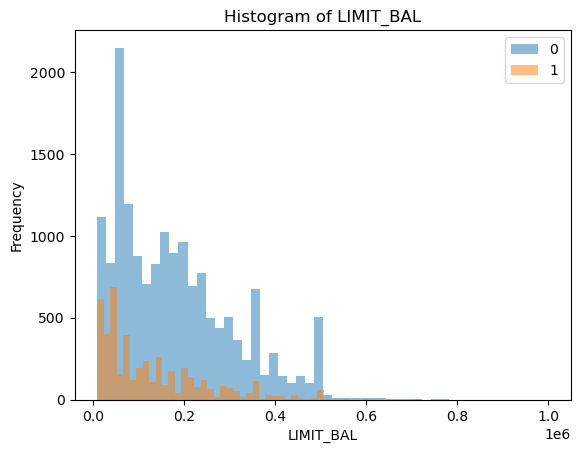

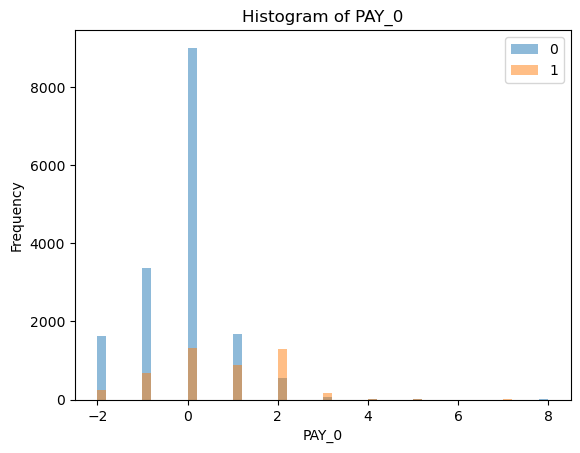

In [7]:
vizualize_cols = ["LIMIT_BAL", "PAY_0"]

for column in vizualize_cols:
    #plotting nearly coppy and pasted from example
    ax = train_df.groupby("default.payment.next.month")[column].plot.hist(bins=50, alpha=0.5, legend=True)
    plt.xlabel(column)
    plt.title("Histogram of " + column)
    plt.show()


In [8]:
...

Ellipsis

In [9]:
...

Ellipsis

In [10]:
...

Ellipsis

In [11]:
...

Ellipsis

In [12]:
...

Ellipsis

In [13]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## (Optional) 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_5
    
</div>

In [14]:
#in this box, I am adding features I think might have an influence and a description of how I got them from the data provided

#the amount spent in each month x is equal to bill(x) - bill(x+1) + pay(x+1)
#we can't know the ammount spent in month 6 because we don't have information on month 7
#however, we can add bill(x) - bill(x+1) + pay(x+1) for month 1 (September) through month 5 (May)
#many of the bills cancel to give a formula of: bill(1) + pay(2) + pay(3) + pay(4) + pay(5) + pay(6) - bill(6)
#for the total ammount spent across the previous 5 months
X_train["SPENT"] = X_train["BILL_AMT1"] + X_train["PAY_AMT2"] + X_train["PAY_AMT3"] + X_train["PAY_AMT4"] + X_train["PAY_AMT5"] + X_train["PAY_AMT5"] + X_train["PAY_AMT6"] - X_train["BILL_AMT6"]
X_test["SPENT"] = X_test["BILL_AMT1"] + X_test["PAY_AMT2"] + X_test["PAY_AMT3"] + X_test["PAY_AMT4"] + X_test["PAY_AMT5"] + X_test["PAY_AMT5"] + X_test["PAY_AMT6"] - X_test["BILL_AMT6"]                             

#because I am intending to get a ratio of spent to paid, I need to find the ammount paid in only the past 5 months
#instead of all months, which gives pay(1) + pay(2) + pay(3) + pay(4) + pay(5)
X_train["PAID"] = X_train["PAY_AMT1"] + X_train["PAY_AMT2"] + X_train["PAY_AMT3"] + X_train["PAY_AMT4"] + X_train["PAY_AMT5"] + X_train["PAY_AMT5"]
X_test["PAID"] = X_test["PAY_AMT1"] + X_test["PAY_AMT2"] + X_test["PAY_AMT3"] + X_test["PAY_AMT4"] + X_test["PAY_AMT5"] + X_test["PAY_AMT5"]

X_train["PAID_TO_SPENT"] = X_train["PAID"] / (X_train["SPENT"] + .01) #add .01 to prevent dividing by 0
X_test["PAID_TO_SPENT"] = X_test["PAID"] / (X_test["SPENT"] + .01)

X_train["SPENT_TO_LIMIT"] = X_train["SPENT"] / (X_train["LIMIT_BAL"] + .01) #add .01 to prevent dividing by 0
X_test["SPENT_TO_LIMIT"] = X_test["SPENT"] / (X_test["LIMIT_BAL"] + .01)

X_train["BILL1_TO_LIMIT"] = X_train["BILL_AMT1"] / (X_train["LIMIT_BAL"] + .01) #add .01 to prevent dividing by 0
X_test["BILL1_TO_LIMIT"] = X_test["BILL_AMT1"] / (X_test["LIMIT_BAL"] + .01)

#both 5 and 6 mean unknown
X_train["EDUCATION"].replace(6, 5, inplace=True)
X_test["EDUCATION"].replace(6, 5, inplace=True)

In [15]:
#defining numeric/binary/categorical/passthrough/drop features
numeric_features = ["LIMIT_BAL", "AGE", "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6", "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6", "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6", "SPENT", "PAID", "PAID_TO_SPENT", "SPENT_TO_LIMIT", "BILL1_TO_LIMIT"]
binary_features = ["SEX"]
categorical_features = ["MARRIAGE"]
passthrough_features = ["EDUCATION"]
drop_features = ["ID"]

X_train.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SPENT,PAID,PAID_TO_SPENT,SPENT_TO_LIMIT,BILL1_TO_LIMIT
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,...,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,2.100000e+04,2.100000e+04,21000.000000,21000.000000
mean,14962.348238,167880.651429,1.600762,1.850476,1.554000,35.500810,-0.015429,-0.137095,-0.171619,-0.225238,...,5.895027e+03,5311.432286,4774.021381,4751.850095,5237.762190,4.306231e+04,3.115777e+04,4.328499e+02,0.328628,0.423636
std,8650.734050,130202.682167,0.489753,0.785254,0.521675,9.212644,1.120465,1.194506,1.196123,1.168556,...,2.180143e+04,18377.997079,15434.136142,15228.193125,18116.846563,7.194694e+04,6.253061e+04,1.478602e+04,0.433782,0.413183
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-3.200670e+05,0.000000e+00,-2.841206e+03,-0.868899,-0.230900
25%,7498.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,8.200000e+02,390.000000,266.000000,234.000000,110.750000,6.086500e+03,6.406750e+03,3.463767e-01,0.059481,0.022372
50%,14960.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,2.007000e+03,1809.500000,1500.000000,1500.000000,1500.000000,2.060200e+04,1.386600e+04,8.158214e-01,0.179846,0.314359
75%,22458.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000e+03,4628.500000,4021.250000,4016.000000,4000.000000,5.096350e+04,3.256200e+04,1.322808e+00,0.462633,0.828187
max,30000.000000,1000000.000000,2.000000,5.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,1.227082e+06,896040.000000,621000.000000,426529.000000,528666.000000,2.780085e+06,3.639066e+06,1.320600e+06,15.160536,6.455297


In [16]:
#making column transformer
ct = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(drop='if_binary'), binary_features),
    (make_pipeline(SimpleImputer(missing_values=0, strategy='most_frequent'), OneHotEncoder()), categorical_features),
    (SimpleImputer(missing_values=0, strategy='most_frequent'), passthrough_features),
    ("drop", drop_features),
)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

In [17]:
dummy_pipe = make_pipeline(ct, DummyClassifier())


In [18]:
dummy_pipe.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['LIMIT_BAL', 'AGE', 'PAY_0',
                                                   'PAY_2', 'PAY_3', 'PAY_4',
                                                   'PAY_5', 'PAY_6',
                                                   'BILL_AMT1', 'BILL_AMT2',
                                                   'BILL_AMT3', 'BILL_AMT4',
                                                   'BILL_AMT5', 'BILL_AMT6',
                                                   'PAY_AMT1', 'PAY_AMT2',
                                                   'PAY_AMT3', 'PAY_AMT4',
                                                   'PAY_AMT5', 'PAY_AMT6',
                                                   'SPENT', 'PAID',
                                                   'PAID_TO_SPENT',
                                                   'SPENT_TO_...
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['SEX']),
                                                 ('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(missing_values=0,
                                                                                 strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['MARRIAGE']),
                                                 ('simpleimputer',
                                                  SimpleImputer(missing_values=0,
                                                                strategy='most_frequent'),
                                                  ['EDUCATION']),
                                                 ('drop', 'drop', ['ID'])])),
                ('dummyclassifier', DummyClassifier())])

<!-- END QUESTION -->



recall is 0, precision is undefined


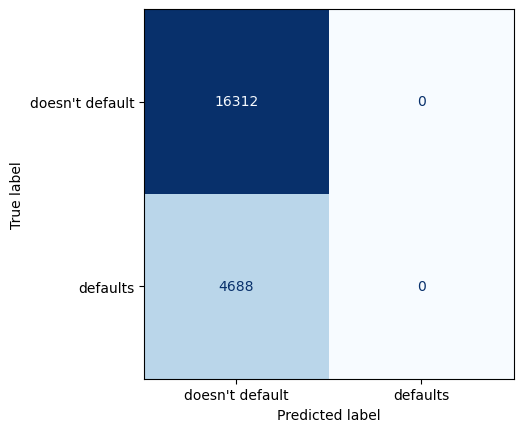

In [19]:
#from lecture 9
disp = ConfusionMatrixDisplay.from_estimator(
    dummy_pipe,
    X_train,
    y_train,
    display_labels=["doesn't default", "defaults"],
    values_format="d",
    cmap=plt.cm.Blues,
    colorbar=False,
)

print("recall is 0, precision is undefined") 



<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

I at first tried with class_weight as the default and I got a recall of only around .25, so really bad considering that I'm looking at recall as my primary scoring metric.
However, with class_weights='balanced' the recall is MUCH better, it gets up to around .633. It's also interesting to note that the accuracy went from .81 to .7, so the accuracy is actually worse than the dummy classifier now, but I believe it to be a better model. Furthermore, there really isn't any noticible overfitting going on, the test and the train scores for accuracy, f1, recall, and precision are all roughly equal. The fact that I am at a recall of only .633 and the model continues to get more complex without improving or overfitting leads me to believe that a linear model does not fit my data all that well, so hopefully the non-linear models will work better. I've also considered the standard deviation on the resulting data and it is low enough that the scores are quite trustworthy.

In [20]:
#taken from lecture 3
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation
    """
    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)



In [21]:
pipe_lr = make_pipeline(ct, LogisticRegression())

param_C = {
    "C": [.0001, 0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
}
results_lr = {}

for val in param_C["C"]:
    pipe_lr = make_pipeline(ct, LogisticRegression(C=val, class_weight='balanced'))
    results_lr[val] = mean_std_cross_val_scores(pipe_lr, X_train, y_train, scoring=["accuracy", "f1", "recall", "precision"], cv=10, n_jobs=-1, return_train_score=True)
    
pd.DataFrame(results_lr).T

,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1,test_recall,train_recall,test_precision,train_precision
0.0001,0.198 (+/- 0.052),0.040 (+/- 0.006),0.669 (+/- 0.008),0.669 (+/- 0.002),0.455 (+/- 0.013),0.456 (+/- 0.002),0.619 (+/- 0.026),0.621 (+/- 0.002),0.360 (+/- 0.009),0.360 (+/- 0.003)
0.0010,0.263 (+/- 0.064),0.043 (+/- 0.013),0.697 (+/- 0.007),0.697 (+/- 0.002),0.479 (+/- 0.015),0.479 (+/- 0.002),0.624 (+/- 0.027),0.624 (+/- 0.002),0.388 (+/- 0.010),0.388 (+/- 0.002)
0.0100,0.385 (+/- 0.122),0.038 (+/- 0.011),0.699 (+/- 0.008),0.700 (+/- 0.002),0.483 (+/- 0.014),0.485 (+/- 0.002),0.630 (+/- 0.024),0.632 (+/- 0.003),0.392 (+/- 0.010),0.393 (+/- 0.002)
0.1000,0.513 (+/- 0.156),0.035 (+/- 0.014),0.700 (+/- 0.008),0.700 (+/- 0.002),0.484 (+/- 0.015),0.485 (+/- 0.002),0.632 (+/- 0.024),0.633 (+/- 0.003),0.393 (+/- 0.011),0.393 (+/- 0.002)
1.0000,0.461 (+/- 0.109),0.041 (+/- 0.009),0.700 (+/- 0.008),0.700 (+/- 0.002),0.484 (+/- 0.015),0.485 (+/- 0.002),0.632 (+/- 0.024),0.633 (+/- 0.003),0.393 (+/- 0.011),0.393 (+/- 0.002)
10.0000,0.416 (+/- 0.133),0.039 (+/- 0.012),0.700 (+/- 0.009),0.700 (+/- 0.002),0.484 (+/- 0.015),0.485 (+/- 0.002),0.632 (+/- 0.024),0.633 (+/- 0.003),0.393 (+/- 0.012),0.393 (+/- 0.002)
100.0000,0.407 (+/- 0.119),0.037 (+/- 0.009),0.700 (+/- 0.009),0.700 (+/- 0.002),0.484 (+/- 0.015),0.485 (+/- 0.002),0.632 (+/- 0.024),0.633 (+/- 0.003),0.393 (+/- 0.012),0.393 (+/- 0.002)
1000.0000,0.412 (+/- 0.124),0.038 (+/- 0.013),0.700 (+/- 0.009),0.700 (+/- 0.002),0.484 (+/- 0.015),0.485 (+/- 0.002),0.632 (+/- 0.024),0.633 (+/- 0.003),0.393 (+/- 0.012),0.393 (+/- 0.002)


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

decision tree classifier:
    The train scores (accuracy, f1, recall, precision) are all incredibly high (around 1) which indicates that they are overfitting very hard. The fit and score times are also quite reasonable for this model. The recall, however is significantly worse than the other models.
    
svm rbf:
    The train scores combined with the test scores indicate that SVM RBF is not overfitting yet, which would mean it could be underfitting. It would not underfitting very much, however, since the train score is similar to the test score. Regardless it would definitely be worth doing more hyperparameter optimization with SVM RBF considering its test recall is on the higher end and it could improve with more optimization. Additionally, it has the best accuracy and a good f1 score, which are nice despite not being the primary metric of evaluation. Fit time and score time, however are very slow for this model. I will probably reduce the number of cross validation splits so the hyperparameter optimization of SVM RBF does not take too long. Reducing the number of features might also help with this.

lightGBM:
    similar to SVM RBF, the train scores and test scores indicate that the model is probably not overfitting yet, and it is very close to the linear model when it comes to recall. The accuracy, f1, and precision are also similar to SVM RBF. It would be worth doing hyperparameter optimization on this model as well to see if it can be improved past the linear model. Thankfully, as opposed to SVM RBF, lightGBM is much faster, and takes only slightly longer than the decision tree to fit and score.

In [22]:
pipe_dt = make_pipeline(ct, DecisionTreeClassifier(class_weight='balanced'))
pipe_svm = make_pipeline(ct, SVC(kernel = "rbf", class_weight='balanced'))
pipe_lgbm = make_pipeline(ct, LGBMClassifier(class_weight='balanced'))

In [23]:
#from lecture 11
model_results = {}
classifiers = {
    "decision tree" : (pipe_dt, 10),
    "svm rbf" : (pipe_svm, 4),
    "lightGBM" : (pipe_lgbm, 10),
}

for (name, tup) in classifiers.items():
    model_results[name] = mean_std_cross_val_scores(tup[0], X_train, y_train, scoring=["accuracy", "f1", "recall", "precision"], cv=tup[1], n_jobs=-1, return_train_score=True)

In [24]:
pd.DataFrame(model_results).T

,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1,test_recall,train_recall,test_precision,train_precision
decision tree,1.175 (+/- 0.200),0.032 (+/- 0.010),0.730 (+/- 0.007),0.999 (+/- 0.000),0.395 (+/- 0.014),0.998 (+/- 0.000),0.394 (+/- 0.018),1.000 (+/- 0.000),0.396 (+/- 0.014),0.997 (+/- 0.000)
svm rbf,33.658 (+/- 0.119),13.107 (+/- 0.268),0.779 (+/- 0.008),0.791 (+/- 0.002),0.538 (+/- 0.013),0.564 (+/- 0.004),0.576 (+/- 0.009),0.607 (+/- 0.006),0.504 (+/- 0.016),0.527 (+/- 0.004)
lightGBM,1.251 (+/- 0.261),0.061 (+/- 0.016),0.768 (+/- 0.008),0.830 (+/- 0.002),0.541 (+/- 0.015),0.670 (+/- 0.003),0.612 (+/- 0.017),0.774 (+/- 0.004),0.485 (+/- 0.015),0.590 (+/- 0.004)


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## (Optional) 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

I tried some feature selection with RFECV although it is pretty clear that it is optimizing them with respect to accuracy, I did some research into how to get RFECV to score based on
recall and I ran into some trouble. With more time, I would have liked to to do more extensive feature selection that is scored based on recall (including on SVM despite the fact that RFE doesn't like SVM). I will be abandoning the feature selection I have done thus far.

In [25]:
column_names = (
    numeric_features
    + ct.named_transformers_["onehotencoder"].get_feature_names_out().tolist()
    + ct.named_transformers_["pipeline"].get_feature_names_out().tolist()
    + ct.named_transformers_["simpleimputer"].get_feature_names_out().tolist()
)
X_train_transformed = pd.DataFrame(ct.fit_transform(X_train), columns=column_names)

rfe_cv_lr = RFECV(LogisticRegression(C=.1, class_weight='balanced'), cv=10)
rfe_cv_lr.fit(X_train_transformed, y_train.values.ravel())

lr_scores = mean_std_cross_val_scores(LogisticRegression(C=.1, class_weight='balanced'), X_train_transformed.T[rfe_cv_lr.support_].T, y_train, scoring=["accuracy", "f1", "recall", "precision"], cv=10, n_jobs=-1,return_train_score=True)
pd.DataFrame(lr_scores).T

,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1,test_recall,train_recall,test_precision,train_precision
0,0.046 (+/- 0.019),0.017 (+/- 0.014),0.781 (+/- 0.009),0.781 (+/- 0.001),0.514 (+/- 0.014),0.514 (+/- 0.002),0.518 (+/- 0.014),0.518 (+/- 0.002),0.511 (+/- 0.021),0.510 (+/- 0.002)


In [26]:
rfe_cv_dt = RFECV(DecisionTreeClassifier(class_weight='balanced'), cv=10)
rfe_cv_dt.fit(X_train_transformed, y_train.values.ravel())

dt_scores = mean_std_cross_val_scores(DecisionTreeClassifier(class_weight='balanced'), X_train_transformed.T[rfe_cv_dt.support_].T, y_train, scoring=["accuracy", "f1", "recall", "precision"], cv=10, n_jobs=-1,return_train_score=True)
pd.DataFrame(dt_scores).T

,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1,test_recall,train_recall,test_precision,train_precision
0,1.075 (+/- 0.170),0.014 (+/- 0.006),0.731 (+/- 0.011),0.999 (+/- 0.000),0.401 (+/- 0.017),0.998 (+/- 0.000),0.403 (+/- 0.019),1.000 (+/- 0.000),0.399 (+/- 0.020),0.997 (+/- 0.000)


In [27]:
rfe_cv_lgbm = RFECV(LGBMClassifier(class_weight='balanced'), cv=10)
rfe_cv_lgbm.fit(X_train_transformed, y_train.values.ravel())

lgbm_scores =mean_std_cross_val_scores(LGBMClassifier(class_weight='balanced'), X_train_transformed.T[rfe_cv_lgbm.support_].T, y_train, scoring=["accuracy", "f1", "recall", "precision"], cv=10, n_jobs=-1,return_train_score=True)
pd.DataFrame(lgbm_scores).T

,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1,test_recall,train_recall,test_precision,train_precision
0,1.397 (+/- 0.263),0.045 (+/- 0.011),0.770 (+/- 0.008),0.829 (+/- 0.002),0.544 (+/- 0.015),0.668 (+/- 0.003),0.612 (+/- 0.019),0.769 (+/- 0.008),0.489 (+/- 0.015),0.590 (+/- 0.004)


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

I conducted hyperparameter optimization with both my decision tree classifier, and my lightGBM classifer. I tried to conduct hyperparameter optimization with SVM RBF but my
computer was not powerful enough to have a meaningful number of iterations, and so I have decided to stop testing with it. I used GridSearchCV with my decision tree classifier because I was only tuning one hyperparameter, whereas I used RandomizedSearchCV with lightGBM classifier because I was tuning 3 hyperparameters. Both of them, with hyperparameter tuning, turned out better than the linear model.

DecisionTreeClassifier:
it is possible to see some very clear overfitting going on after not a large max depth. The train recall hits 1 wherease the test recall tanks to .4. the largest mean_test_recall is when the max depth hyperparameter is 4, which corrosponds to a mean test recall of .65. Not great, but doing better.

LightGBMClassifier
Because I used randomizedSearchCV the overfitting is not as obvious, although there were some parameter combinations that made it clear that overfitting was occuring (for example when the n_estimators parameter got large and there was a clear split between mean train and mean test scores. The best performing model overall was a LightGBMClassifier with n_estimators=3, max_Depth=2, and feature_fraction=.6. It is interesting to me that, at least with max depth and feature_fraction the model performs best with numbers that corrospond to relatively low complexity. I'm wondering if this is an indication that there are a small number of very important parameters as opposed to a 

In [28]:
param_dt = {
    "max_depth": np.int_(np.linspace(1, 50, 50)),
}

search_dt = GridSearchCV(
    DecisionTreeClassifier(class_weight='balanced'), param_dt, n_jobs=-1, cv=10, scoring=["recall"], refit=False, return_train_score=True
)

search_dt.fit(X_train_transformed, y_train)
pd.DataFrame(search_dt.cv_results_)[["mean_fit_time", "std_fit_time", "param_max_depth", "mean_test_recall", "mean_train_recall"]]

,mean_fit_time,std_fit_time,param_max_depth,mean_test_recall,mean_train_recall
0,0.178635,0.039918,1,0.517917,0.517918
1,0.230509,0.031015,2,0.623283,0.633272
2,0.404467,0.096722,3,0.553754,0.558494
3,0.442375,0.063076,4,0.650583,0.666478
4,0.669803,0.161508,5,0.574643,0.595612
5,0.923924,0.219034,6,0.593415,0.628674
6,0.677960,0.023601,7,0.612626,0.673421
7,0.797247,0.078568,8,0.598533,0.684443
8,0.793117,0.022269,9,0.593851,0.716036
9,0.862438,0.024445,10,0.586380,0.742440


In [29]:
param_lgdb = {
    "n_estimators" : [1, 2, 3, 4, 5, 10, 20, 50, 75, 100, 150, 200],#, 50, 100, 250, 500],
    "max_depth" : [1,2,3,4,5,6,7,8,9,10, 25, 50],
    "feature_fraction" : [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1],#, 15, 20, 25],
}

search_lgbm = RandomizedSearchCV(
    LGBMClassifier(class_weight='balanced'), param_lgdb, n_jobs=-1, cv=5, n_iter=50, scoring=["recall"], refit=False, return_train_score=True
)

search_lgbm.fit(X_train_transformed, y_train)
pd.DataFrame(search_lgbm.cv_results_)[["mean_fit_time", "std_fit_time", "param_n_estimators", "param_max_depth", "param_feature_fraction", "mean_test_recall", "mean_train_recall"]]

,mean_fit_time,std_fit_time,param_n_estimators,param_max_depth,param_feature_fraction,mean_test_recall,mean_train_recall
0,1.989508,0.097679,200,6,0.8,0.596198,0.845296
1,0.323222,0.088907,1,50,0.1,0.585955,0.615616
2,1.019092,0.092404,100,5,0.7,0.618809,0.714057
3,0.326215,0.060958,4,5,0.2,0.593216,0.615615
4,0.510273,0.049996,50,4,0.2,0.634381,0.658543
5,0.229739,0.004756,1,25,0.5,0.617956,0.646013
6,0.416110,0.022212,100,2,0.1,0.626065,0.634919
7,0.334410,0.018392,10,4,1,0.607498,0.623296
8,0.277666,0.010393,5,25,0.7,0.616252,0.647505
9,0.659706,0.094455,50,50,0.4,0.624570,0.711124


In [30]:
...

Ellipsis

In [31]:
...

Ellipsis

In [32]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

PAY_0 is the most important feature by a lot, at a weight of 0.6073, followed by PAY_2 at 0.2595, and then SPENT and PAY_6. There are very few features that have any weight at all.

Some of what I see makes sense, and other bits I am confused about. I think it makes a lot of sense that PAY_0 is the most important feature, if someone misses a monthly payment the month before then it would not be surprising at all for them to default. Along these lines, it also makes sense that PAY_2 is also important, for the same reason (despite not being quite as important). Seeing SPENT so high is a little bit confusing to me, since spending a lot does not necessarily mean that someone is going to default, especially if their limit is high. I suppose that SPENT being so high could be because in conjunction with PAY_0 and PAY_2 it is important. I am a little bit surprised that LIMIT_BAL isn't in there though, because spending a lot when having a low limit I would think would contribute. Seeing PAY_6 have such a little weight isn't surprising, I assume it is just a quirk of the data that PAY_6 is there but PAY_3 through PAY_5 isn't. 

I am confused about the fact that only 4 features have any weight at all, I did predict before that since the best model is less complex that it is more likely a few important features deciding the outcome, although the fact that they are the only ones that decide the outcome is a bit surprising.

In [33]:
best_pipe_lgbm = make_pipeline(ct, LGBMClassifier(n_estimators=3, max_depth=2, feature_fraction=.6, class_weight='balanced'))
mean_std_cross_val_scores(best_pipe_lgbm, X_train, y_train, scoring=["accuracy", "f1", "recall", "precision"], cv=10, n_jobs=-1, return_train_score=True)

fit_time           0.308 (+/- 0.047)
score_time         0.045 (+/- 0.014)
test_accuracy      0.691 (+/- 0.015)
train_accuracy     0.693 (+/- 0.015)
test_f1            0.500 (+/- 0.010)
train_f1           0.502 (+/- 0.006)
test_recall        0.692 (+/- 0.026)
train_recall       0.694 (+/- 0.016)
test_precision     0.392 (+/- 0.013)
train_precision    0.394 (+/- 0.013)
dtype: object

In [34]:
best_pipe_lgbm.fit(X_train, y_train.values.ravel())
eli5_lgbm = eli5.explain_weights(
    best_pipe_lgbm.named_steps["lgbmclassifier"], feature_names=list(X_train_transformed.columns)
)
eli5_lgbm

Weight,Feature
0.6073,PAY_0
0.2595,PAY_2
0.1261,SPENT
0.0071,PAY_6
0,PAY_AMT1
0,PAY_3
0,PAY_4
0,PAY_5
0,BILL_AMT1
0,BILL_AMT2


In [35]:
...

Ellipsis

In [36]:
...

Ellipsis

In [37]:
...

Ellipsis

In [38]:
...

Ellipsis

In [39]:
...

Ellipsis

In [40]:
...

Ellipsis

In [41]:
...

Ellipsis

In [42]:
...

Ellipsis

In [43]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

The results from the test set do agree with the training scores, to a degree that I did not expect. I actually got a better recall on the test set than I did on the training set, which is a bit surprising as I didn't train the model with those values. The model is not particularly complex, as I've already mentioned, so the fact that it did as well as it did means that it probably generalizes pretty well. I don't think that I had a problem with optimization bias, given the test score that I have. I have displayed two shap plots, which show how the four important features have impacted a couple guesses, one where all four 'agree' so to speak, and one where the model is very unsure because the features 'disagree'

In [44]:
best_pipe_lgbm.score(X_test, y_test)

0.6682222222222223

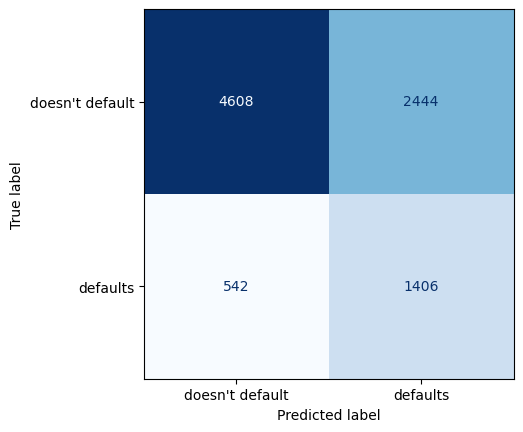

In [45]:
#from lecture 9 
disp = ConfusionMatrixDisplay.from_estimator(
    best_pipe_lgbm,
    X_test,
    y_test,
    display_labels=["doesn't default", "defaults"],
    values_format="d",
    cmap=plt.cm.Blues,
    colorbar=False,
)

In [46]:
#also from lecture 9
predictions = best_pipe_lgbm.predict(X_test)
TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
print("recall is: ", recall)
print("precision is: ", precision)

recall is:  0.7217659137577002
precision is:  0.3651948051948052


In [47]:
#from lecture 12
import warnings

from numba import NumbaDeprecationWarning

warnings.simplefilter(action="ignore", category=NumbaDeprecationWarning)  # ignore warnings
warnings.simplefilter(action="ignore", category=UserWarning)  # ignore warnings

import shap

In [48]:
X_test_transformed = ct.transform(X_test)
lgbm_explainer = shap.TreeExplainer(best_pipe_lgbm.named_steps["lgbmclassifier"])
test_lgbm_shap_values = lgbm_explainer.shap_values(X_test_transformed)
lgbm_explainer

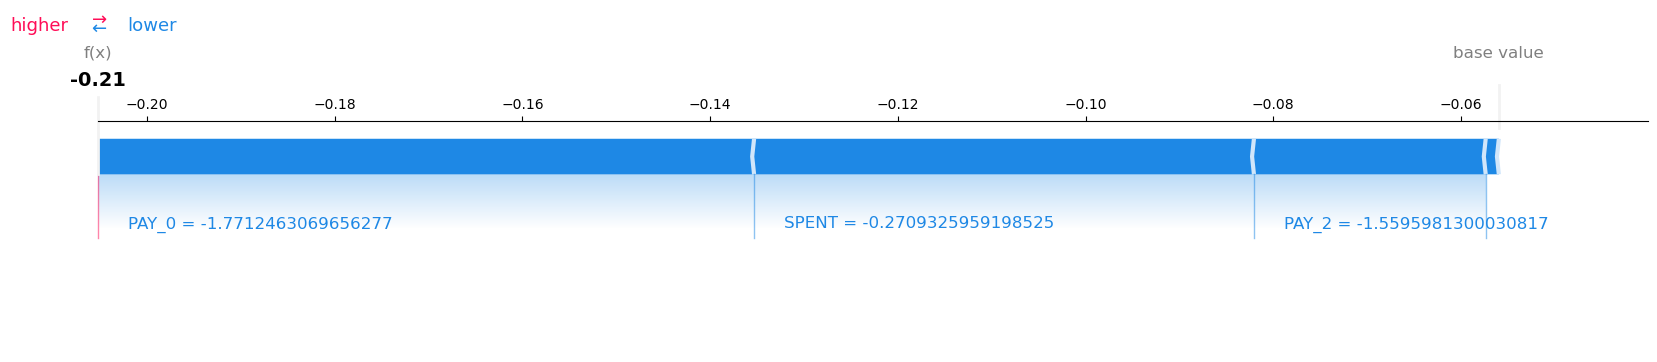

In [49]:
#incorrect false prediction
val = 3
shap.force_plot(
    lgbm_explainer.expected_value[y_test.values.ravel()[val]],
    test_lgbm_shap_values[y_test.values.ravel()[val]][val],
    X_test_transformed[val],
    matplotlib=True,
    feature_names = list(X_train_transformed.columns),
)

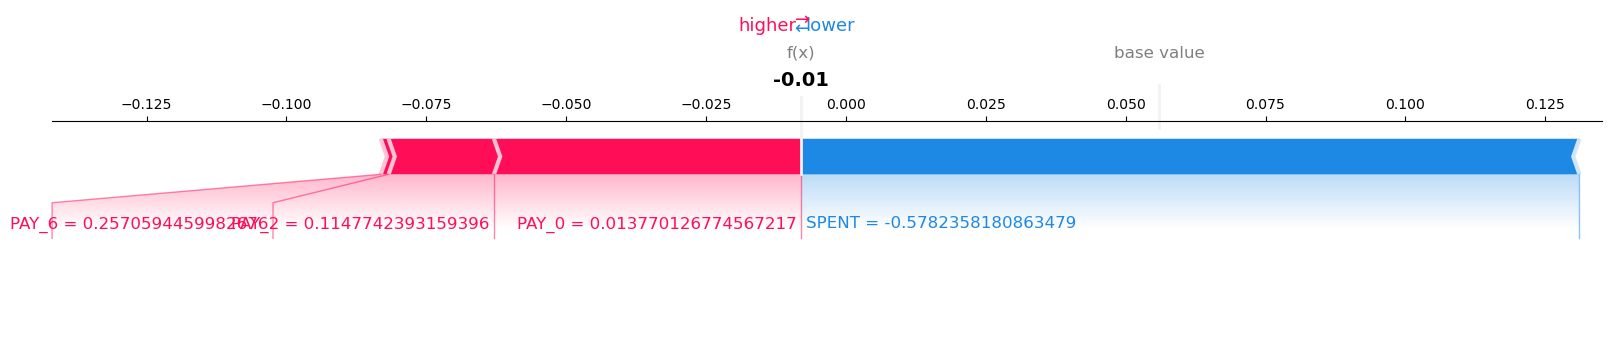

In [50]:
#incorrect true prediction
val = 4
shap.force_plot(
    lgbm_explainer.expected_value[y_test.values.ravel()[val]],
    test_lgbm_shap_values[y_test.values.ravel()[val]][val],
    X_test_transformed[val],
    matplotlib=True,
    feature_names = list(X_train_transformed.columns),
)

In [51]:
...

Ellipsis

In [52]:
...

Ellipsis

In [53]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

In retrospect, I don't think that I would have used recall as the scoring metric. I assumed that I would be able to get a better score than I did, despite improving upon the DummyClassifiers recall. While I do think that a false negative would be the worst case for the bank considering the data set, having a high accuracy is also important. I would like to have been able to test more with SVM, and done some feature selection with it, since SVM may have benefitted more from removing a couple features. In the future I would try a voting classifier which might improve performance. My final test score for recall was 0.7217659137577002, and the accuracy was 0.6682222222222223, so actually worse than the Dummy Classifier but that isn't unexpected considering I wasn't going for accuracy. The most important features were PAY_0, PAY2 - which are an indication for the previous two months of whether a payment was made on time -  and SPENT, which records the total amount spent over the past 5 months.

Weight,Feature
0.6073,PAY_0
0.2595,PAY_2
0.1261,SPENT
0.0071,PAY_6
0,PAY_AMT1
0,PAY_3
0,PAY_4
0,PAY_5
0,BILL_AMT1
0,BILL_AMT2


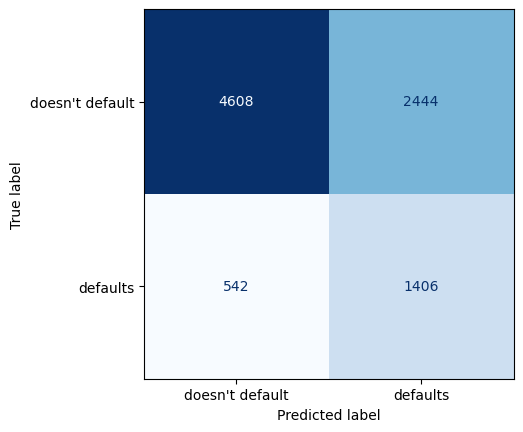

In [54]:
#from lecture 9 
disp = ConfusionMatrixDisplay.from_estimator(
    best_pipe_lgbm,
    X_test,
    y_test,
    display_labels=["doesn't default", "defaults"],
    values_format="d",
    cmap=plt.cm.Blues,
    colorbar=False,
)

eli5_lgbm

In [55]:
print("test accuracy is: ", best_pipe_lgbm.score(X_test, y_test)) 
print("test recall is: ", recall)
print("test precision is: ", precision)
print("test f1 score is: ", ((2 * precision * recall) / (precision + recall)))

test accuracy is:  0.6682222222222223
test recall is:  0.7217659137577002
test precision is:  0.3651948051948052
test f1 score is:  0.48499482580200065


<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## (Optional) 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

The biggest takeaway that I've gotten so far is that creating a good machine learning model doesn't really have to do at all with how clever the code is. In a lot of languages and applications this is not necessarily true. In supervised ml (at least that I've seen so far), all of the clever coding has been done, and a model can be created by anyone with an internet connection and 10 or so lines of code. What makes a good machine learning model depends on the resourcefulness, creativeness, background knowledge, and willingness to iterate of the person creating it.

<div class="alert alert-warning">
    
Solution_14
    
</div>

<!-- END QUESTION -->

<br><br>

**PLEASE READ BEFORE YOU SUBMIT:** 

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
4. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope. 

This was a tricky one but you did it! Have a great weekend! 

![](img/eva-well-done.png)